In [ ]:
#@title Run This Line To Activate Program
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from pandas_datareader.data import get_quote_yahoo
import yfinance as yf
from pandas_datareader import data as pdr
%matplotlib inline
import mplfinance as mpf
from mpl_finance import candlestick_ohlc 



from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
# if error shows yfinance not installed, run: pip install yfinance
# if error shows mplfinance not installed,  run: pip install mplfinance
# if error shows mpl_finance not installed, run: pip install mpl_finance

In [ ]:
pip install yfinance

In [ ]:
pip install mpl_finance

In [ ]:
pip install mplfinance

# Personal Tickers

In [ ]:
#@title Personal Portfolio Daily Summary{ vertical-output: true }
##Run to see data

stocks = ['SPY','AAPL', 'AC.TO', 'TSLA', "LSPD.TO", 'MSFT', 'RY.TO', 'HIVE.V']

date = dt.datetime.now()

print("Daily Summary for " +str(date))
print()
print()

for x in stocks:
  print(x)
  print("-------------------------------")
  print("Current Price: $", get_quote_yahoo(x).price[0], get_quote_yahoo(x).financialCurrency[0])
  print("Intraday change:", round(get_quote_yahoo(x).regularMarketChange[0], 2), " , ", round(get_quote_yahoo(x).regularMarketChangePercent[0], 2), "%")
  print(" ")
  print("Open: $", get_quote_yahoo(x).regularMarketOpen[0])
  print("Daily High: $", get_quote_yahoo(x).regularMarketDayHigh[0])
  print("Daily Low: $", get_quote_yahoo(x).	regularMarketDayLow[0])
  print("Volume:", get_quote_yahoo(x).regularMarketVolume[0])
  print(" ")
  print(" ")
  print(" ")





Daily Summary for 2021-05-10 03:19:58.040733


SPY
-------------------------------
Current Price: $ 422.12 USD
Intraday change: 3.05  ,  0.73 %
 
Open: $ 419.89
Daily High: $ 422.815
Daily Low: $ 419.16
Volume: 67742619
 
 
 
AAPL
-------------------------------
Current Price: $ 130.21 USD
Intraday change: 0.69  ,  0.53 %
 
Open: $ 130.85
Daily High: $ 131.2582
Daily Low: $ 129.475
Volume: 78973273
 
 
 
AC.TO
-------------------------------
Current Price: $ 24.92 CAD
Intraday change: 0.76  ,  3.15 %
 
Open: $ 24.16
Daily High: $ 24.96
Daily Low: $ 23.8
Volume: 3069001
 
 
 
TSLA
-------------------------------
Current Price: $ 672.08 USD
Intraday change: 8.54  ,  1.29 %
 
Open: $ 665.8
Daily High: $ 690.0
Daily Low: $ 660.22
Volume: 23469376
 
 
 
LSPD.TO
-------------------------------
Current Price: $ 76.18 USD
Intraday change: 1.07  ,  1.42 %
 
Open: $ 76.52
Daily High: $ 77.9
Daily Low: $ 74.88
Volume: 557664
 
 
 
MSFT
-------------------------------
Current Price: $ 252.46 USD
I

In [ ]:
#@title  SPY
get_quote_yahoo('SPY')



,language,region,quoteType,quoteSourceName,triggerable,currency,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,firstTradeDateMilliseconds,priceHint,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,ytdReturn,trailingThreeMonthReturns,trailingThreeMonthNavReturns,sharesOutstanding,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,sourceInterval,exchangeDataDelayedBy,tradeable,price
SPY,en-US,US,ETF,Delayed Quote,True,USD,0.071074,1620431999,422.42,0.300018,3.04999,0.727799,1620421583,422.12,422.815,419.16 - 422.815,PCX,SPDR S&P 500,SPDR S&P 500 ETF Trust,finmb_6160262,America/New_York,EDT,-14400000,us_market,False,CLOSED,728317800000,2,419.16,67742619,419.07,422.42,422.6,11,31,NYSEArca,USD,419.89,84603403,72855016,149.13,0.546284,272.99 - 422.82,-0.700012,-0.001656,272.99,422.82,11.8,13.13,12.95,917782016,408.94147,13.178528,0.032226,381.18457,40.935425,0.10739,387414130688,15,0,False,422.12


In [ ]:
#@title  AAPL
get_quote_yahoo('AAPL')



,language,region,quoteType,quoteSourceName,triggerable,currency,firstTradeDateMilliseconds,priceHint,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,displayName,price
AAPL,en-US,US,EQUITY,Delayed Quote,True,USD,345479400000,2,16687599616,4.146,129.05206,1.157944,0.008973,126.331474,3.878532,0.030701,2172892479488,24.383896,31.406178,15,0,2.0 - Buy,False,NMS,Apple Inc.,Apple Inc.,finmb_24937,America/New_York,EDT,-14400000,us_market,False,CLOSED,0.215036,1620431999,130.49,0.279999,0.690002,0.532738,1620417601,130.21,131.2582,129.475 - 131.2582,129.475,78973273,129.52,130.48,130.49,13,18,NasdaqGS,USD,130.85,102300857,93905816,55.15751,0.734919,75.0525 - 145.09,-14.87999,-0.102557,75.0525,145.09,1620864000,1619627400,1627469940,1627905600,0.82,29.267254,0.006331,4.449,5.34,5.2,25.040386,Apple,130.21


In [ ]:
#@title TSLA
get_quote_yahoo('TSLA')

,language,region,quoteType,quoteSourceName,triggerable,currency,tradeable,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingPE,epsForward,marketState,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,epsTrailingTwelveMonths,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,displayName,price
TSLA,en-US,US,EQUITY,Delayed Quote,True,USD,False,1277818200000,2,-0.352484,1620432000,670.0,-2.369995,8.540039,1.287042,1620421583,672.08,690.0,660.22 - 690.0,660.22,23469376,663.54,669.19,670.0,10,32,NasdaqGS,USD,665.8,35014572,28429566,1619467200,1626778740,1627300800,673.4269,6.25,CLOSED,NMS,"Tesla, Inc.","Tesla, Inc.",finmb_27444752,America/New_York,EDT,-14400000,us_market,False,519.42004,3.402463,152.66 - 900.4,-228.32,-0.253576,152.66,900.4,0.998,4.53,148.36203,963329984,23.901,688.3441,-16.2641,-0.023628,665.25146,6.828552,0.010265,647434862592,107.53281,28.119328,15,0,2.8 - Hold,Tesla,672.08


In [ ]:
#@title LSPD.TO
get_quote_yahoo('LSPD.TO')


,language,region,quoteType,quoteSourceName,triggerable,currency,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,price
LSPD.TO,en-US,US,EQUITY,Delayed Quote,True,CAD,78.10051,-1.920509,-0.02459,9996035072,-129.11865,6.621469,15,15,2.2 - Buy,False,1552055400000,2,1.07,1.424577,1620417600,76.18,77.9,74.88 - 77.9,74.88,557664,75.11,76.18,76.3,0,0,Toronto,USD,76.52,749288,664033,54.63,2.535035,21.55 - 104.98,-28.800003,-0.274338,21.55,104.98,1621513800,1621513800,1621513800,-1.267,-0.59,-0.87,-87.56322,131216000,11.505,83.03412,-6.854118,-0.082546,TOR,LIGHTSPEED POS INC,Lightspeed POS Inc.,finmb_105664036,America/Toronto,EDT,-14400000,ca_market,False,CLOSED,76.18


In [ ]:
#@title AC.TO
get_quote_yahoo('AC.TO') 

,language,region,quoteType,quoteSourceName,triggerable,currency,firstTradeDateMilliseconds,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,priceHint,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,marketCap,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,price
AC.TO,en-US,US,EQUITY,Delayed Quote,True,CAD,1269955800000,0.76,3.145696,1620417600,24.92,24.96,23.8 - 24.96,23.8,3069001,24.16,24.85,24.92,0,0,Toronto,CAD,24.16,4579140,3317433,12.12,0.946875,12.8 - 31.0,-6.08,-0.196129,12.8,31.0,1627043400,1627043400,1627043400,2,-16.479,-0.02,-6.97,-3.575323,334759008,5.163,25.746471,-0.826471,-0.0321,23.574453,8342194688,TOR,AIR CANADA,Air Canada,finmb_6491293,America/Toronto,EDT,-14400000,ca_market,False,CLOSED,1.345547,0.057076,-1246.0,4.826651,15,15,2.1 - Buy,False,24.92


In [ ]:
#@title MSFT
get_quote_yahoo('MSFT')

,language,region,quoteType,quoteSourceName,triggerable,currency,averageAnalystRating,tradeable,marketState,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,firstTradeDateMilliseconds,displayName,price
MSFT,en-US,US,EQUITY,Delayed Quote,True,USD,1.6 - Buy,False,CLOSED,1620417602,252.46,254.3,251.17 - 254.3,251.17,27032912,249.73,252.6,252.71,29,31,NasdaqGS,USD,252.15,28472500,26452400,76.780014,0.437045,175.68 - 263.19,-10.729996,-0.040769,175.68,263.19,1623283200,1619539681,1626778740,1627300800,2.19,34.404472,0.008769,7.338,8.35,7.79,32.40822,7531570176,17.853,249.88823,2.571777,0.010292,230.2286,22.2314,0.096562,1901420216320,30.23473,14.141041,15,0,NMS,Microsoft Corporation,Microsoft Corporation,finmb_21835,America/New_York,EDT,-14400000,us_market,False,2,0.055454,1620431997,252.6,0.139999,2.730011,1.093185,511108200000,Microsoft,252.46


In [ ]:
#@title  RY.TO
get_quote_yahoo('RY.TO')



,language,region,quoteType,quoteSourceName,triggerable,currency,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,price
RY.TO,en-US,US,EQUITY,Delayed Quote,True,CAD,108.65854,11.601463,0.10677,171352473600,11.813359,2.06501,15,15,2.1 - Buy,False,789921000000,2,0.690002,0.57707,1620417600,120.26,120.5,118.9 - 120.5,118.9,2268738,119.57,120.25,120.4,0,0,Toronto,CAD,118.9,4639781,2864783,39.54,0.489841,80.72 - 120.5,-0.239998,-0.001992,80.72,120.5,1621555200,1622118600,1622118600,1622118600,4.32,14.887348,0.036129,8.078,10.18,9.84,12.221545,1424850048,58.237,117.183235,3.076767,0.026256,TOR,ROYAL BANK OF CANADA,Royal Bank of Canada,finmb_109809,America/Toronto,EDT,-14400000,ca_market,False,CLOSED,120.26


In [ ]:
#@title HIVE.V
get_quote_yahoo('HIVE.V')

,language,region,quoteType,quoteSourceName,triggerable,currency,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingPE,epsTrailingTwelveMonths,epsForward,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,tradeable,marketState,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,price
HIVE.V,en-US,US,EQUITY,Delayed Quote,True,CAD,1505827800000,4,0.14,3.684213,1620417599,3.94,4.04,3.82 - 4.04,3.82,2229158,3.8,3.93,3.97,0,0,TSXV,USD,3.9,5389411,3627050,3.645,12.355932,0.295 - 7.25,-3.31,-0.456552,0.295,7.25,1583260200,1583260200,1583260200,37.52381,0.105,-0.01,377000000,0.155,4.372353,-0.432353,-0.098883,3.039124,0.900876,0.296426,1485379968,-394.0,25.419355,15,0,3.0 - Hold,False,CLOSED,VAN,HIVE BLOCKCHAIN TECHNOLOGIES LT,HIVE Blockchain Technologies Ltd.,finmb_3175641,America/Toronto,EDT,-14400000,ca_market,False,3.94


# Custom Stock Data and Visualizers

In [ ]:
#@title Stock Data for the Last 10 Minutes
company = input("Enter the stock symbol : ") 
print(company)
intraday_data = yf.download(tickers=company, #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="1d",
 interval="1m") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)
intraday_data.tail(10)

Enter the stock symbol : AAPL
AAPL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-05-07 15:50:00-04:00,130.399994,130.449997,130.320007,130.434998,130.434998,281109
2021-05-07 15:51:00-04:00,130.429993,130.440002,130.339996,130.365005,130.365005,178182
2021-05-07 15:52:00-04:00,130.360001,130.410004,130.330002,130.360001,130.360001,162617
2021-05-07 15:53:00-04:00,130.360001,130.410004,130.335007,130.380005,130.380005,175058
2021-05-07 15:54:00-04:00,130.380005,130.500000,130.354996,130.449997,130.449997,406742
2021-05-07 15:55:00-04:00,130.455002,130.550003,130.449997,130.500000,130.500000,360894
2021-05-07 15:56:00-04:00,130.500000,130.500000,130.320007,130.339996,130.339996,372397
2021-05-07 15:57:00-04:00,130.339996,130.429993,130.330093,130.425003,130.425003,274799
2021-05-07 15:58:00-04:00,130.420105,130.429993,130.229996,130.240097,130.240097,503093


Enter the stock symbol: AAPL
[*********************100%***********************]  1 of 1 completed


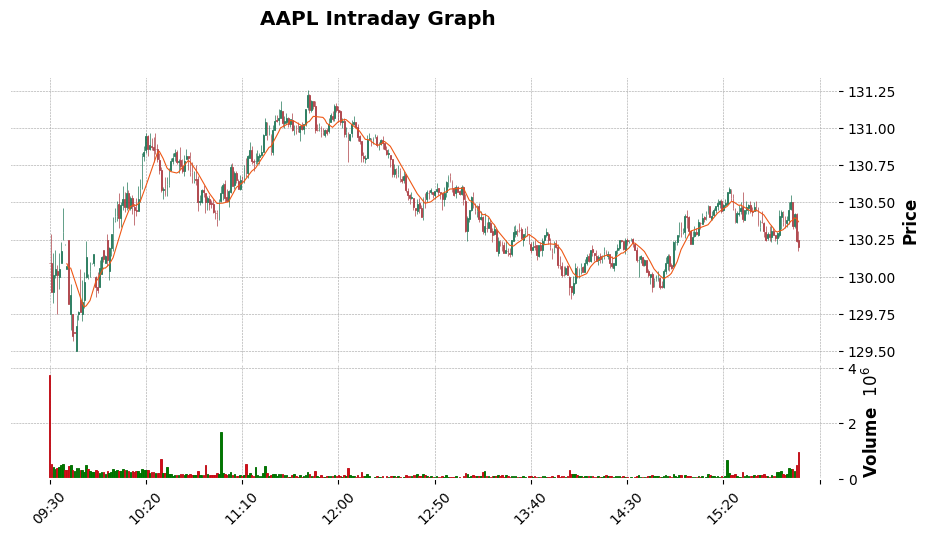

In [ ]:
#@title Intraday Chart
%matplotlib inline
import mplfinance as mpf


company = input("Enter the stock symbol: ")

intraday_data = yf.download(tickers=company, #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="1d",
 interval="1m")


graph_title = company + " Intraday Graph"
Graph_Type = 'candle' #@param ["line", "candle"] {allow-input: true}

mpf.plot(intraday_data,type = Graph_Type, figratio = (2,1),
         title = graph_title , mav = (10), volume = True, 
         style = 'charles')


Enter the stock symbol: AAPL


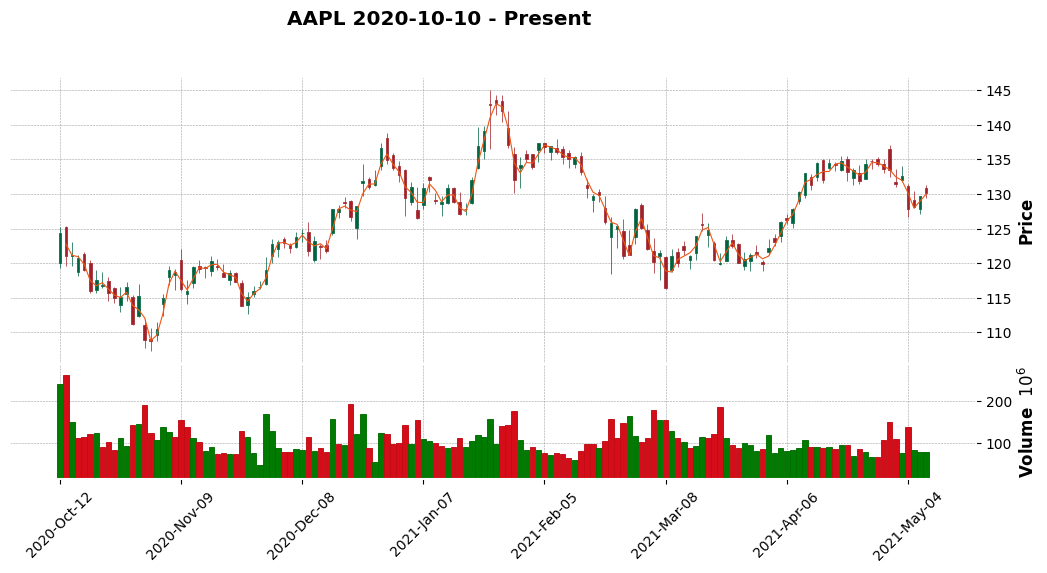

In [ ]:
#@title Specific Time Period Chart

company = input("Enter the stock symbol: ")
data = web.DataReader(company, data_source ='yahoo', start = '2012-01-17', end =dt.datetime.now() )
Graph_Type = 'candle' #@param ["line", "candle"] {allow-input: true}
start_date = '2020-10-10' #@param {type:"date"}
end = '2021-05-09' #@param {type:"date"}
graph_title = company + " " +start_date + " - Present"
mpf.plot(data[start_date : end],type = Graph_Type, figratio = (7,3),
         title = graph_title , mav = (2), volume = True, 
         style = 'charles')

Enter the stock symbol: AAPL


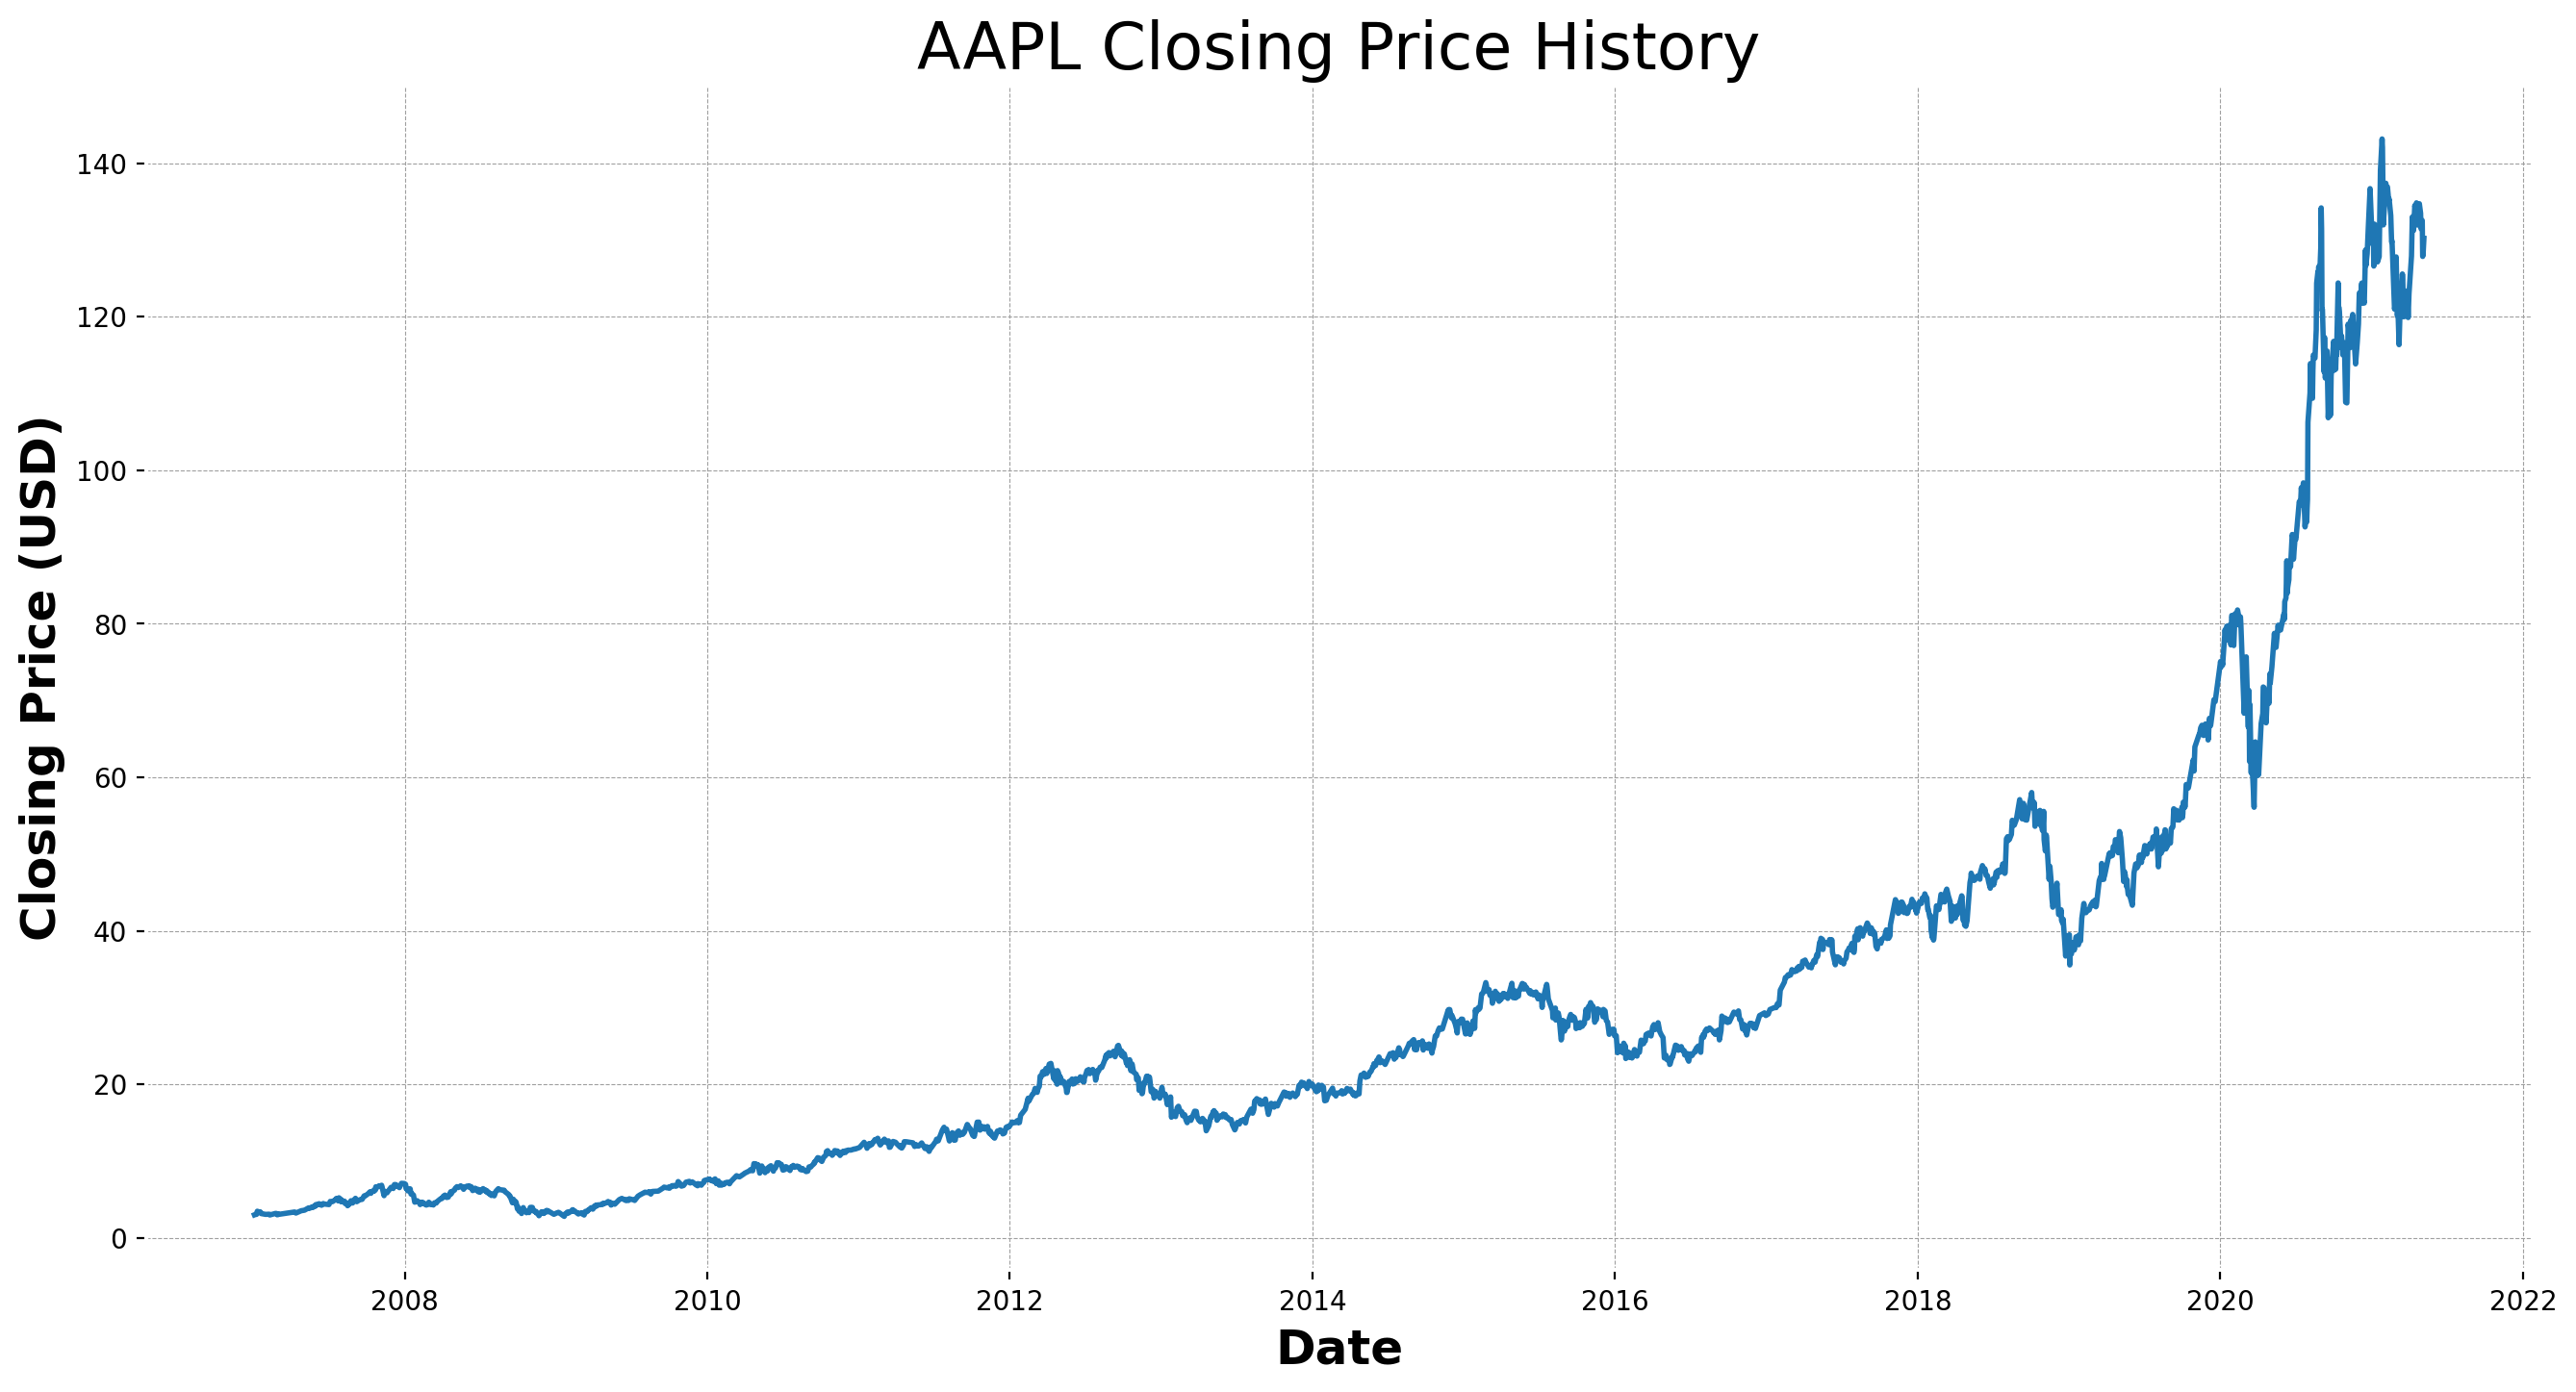

In [ ]:
#@title Closing Price History
#Select date to represent on graph
company = input("Enter the stock symbol: ")
data = web.DataReader(company, data_source ='yahoo', start = '2007-01-01', end =dt.datetime.now() )

data.shape
plt.figure(figsize = (16,8))
plt.title(company +' Closing Price History', fontsize = 24)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price (USD)', fontsize = 18)

plt.show()


# Price Prediction (IN PROGRESS)

In [ ]:
#Uses recurrent neural networks and tensorflow to predict a future 

In [ ]:
#Prepares and scales data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 75

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))



In [ ]:
#@title
#Builds the Model
model = Sequential() #Calls Squential method

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add (Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of next closing price

model.compile (optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=2, batch_size = 2)
#default: 50 and 150
 #Epcohs are how many times you go through your training set. Base =25 batch size =32



In [ ]:
#Test the model accuracy on existing data
test_start = dt.datetime(2019,2,25) #For more stable stocks, choose a start date further in the past. For volitile stocks, select a start date a week or two prior
test_end = dt.datetime.now() 

test_data = web.DataReader(company,'yahoo',test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data["Close"], test_data['Close']), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [ ]:
#Makes preditions on data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) #reverses scaling
plt.plot(actual_prices, color = "black", label = f"Actual")
plt.plot(predicted_prices, color = "green", label = f"Prediction")
plt.title(f"{company} Share Price")
plt.xlabel('Number of Days Past Start Date')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

#Predicting one day into the future
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print ("The projected price for ",company, " for tomorrow is approximately:")
print(prediction)


# Indicators and Analysis Charts

Enter the stock symbol: AAPL

Notable Pivot Points: 
$132.05 on 2021-01-08 00:00:00
$143.16 on 2021-01-26 00:00:00
$137.39 on 2021-02-04 00:00:00
$127.79 on 2021-03-01 00:00:00
$125.57 on 2021-03-16 00:00:00
$134.84 on 2021-04-19 00:00:00

Major Support at: $129.75
Major Resistance at: $137.07



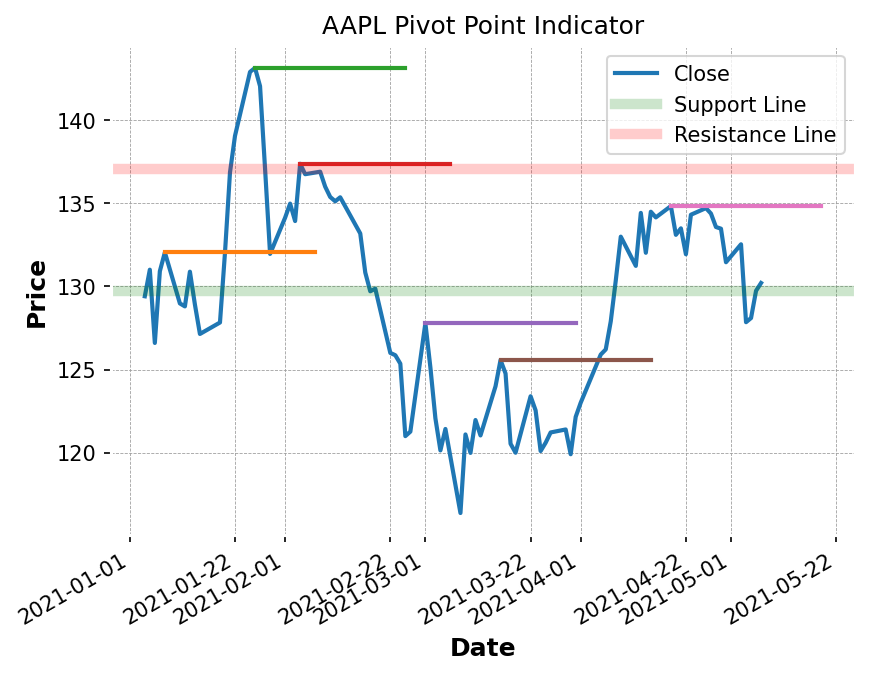

In [ ]:
#@title Pivot point and Resistance indicator (Year to Date)

start_resistance = dt.datetime(2021,1,1)
now = dt.datetime.now()
stock = input("Enter the stock symbol: ")

df = pdr.get_data_yahoo(stock, start_resistance, now)

df["Close"].plot(Label = "CLosing Price")

pivots=[]
dates = [] #stores dates of pivots
counter = 0 #counts number of days since last pivot
lastPivot = 0 #Stores last Pivot value

Range = [0,0,0,0,0,0,0,0,0,0]
dateRange = [0,0,0,0,0,0,0,0,0,0]

for i in df.index:
  currentMax = max(Range, default = 0)
  value = round(df["Close"][i],2)

  Range = Range[1:9]
  Range.append(value)
  dateRange = dateRange[1:9]
  dateRange.append(i)

  if currentMax == max(Range, default = 0):
    counter += 1
  else:
    counter = 0
  if counter == 5:
    lastPivot = currentMax
    dateloc = Range.index(lastPivot)
    lastDate = dateRange[dateloc]

    pivots.append(lastPivot)
    dates.append(lastDate)

pivot_high_1=df['High'][-21:-1].max()
pivot_low_1=df['High'][-21:-1].min()

print()
numer_of_days_the_resistance_should_hold = 30
timeD = dt.timedelta(days = numer_of_days_the_resistance_should_hold) #determines how many days to draw pivot point for

for index in range(len(pivots)):
  plt.plot_date([dates[index], dates[index]+ timeD],
    [pivots[index], pivots[index]], linestyle = "-", linewidth = 2, marker = ",")
  




print("Notable Pivot Points: ")
for index in range(len(pivots)):
  print("$" + str(pivots[index])+" on " + str(dates[index]))
print()

rounded_pivot_high_1 = round(pivot_high_1, 2)
rounded_pivot_low_1 = round(pivot_low_1, 2)
print("Major Support at: $" + str(rounded_pivot_low_1))
print("Major Resistance at: $" + str(rounded_pivot_high_1))
print()


plt.title(stock + " Pivot Point Indicator")
plt.ylabel("Price")
plt.axhline(y = pivot_low_1, color = 'g', linewidth = 5, linestyle = '-', alpha=0.2, label = "Support Line")
plt.axhline(y = pivot_high_1, color = 'r', linewidth = 5, linestyle = '-', alpha=0.2, label = "Resistance Line")
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()
print()









  

Enter the stock symbol: aapl
[*********************100%***********************]  1 of 1 completed



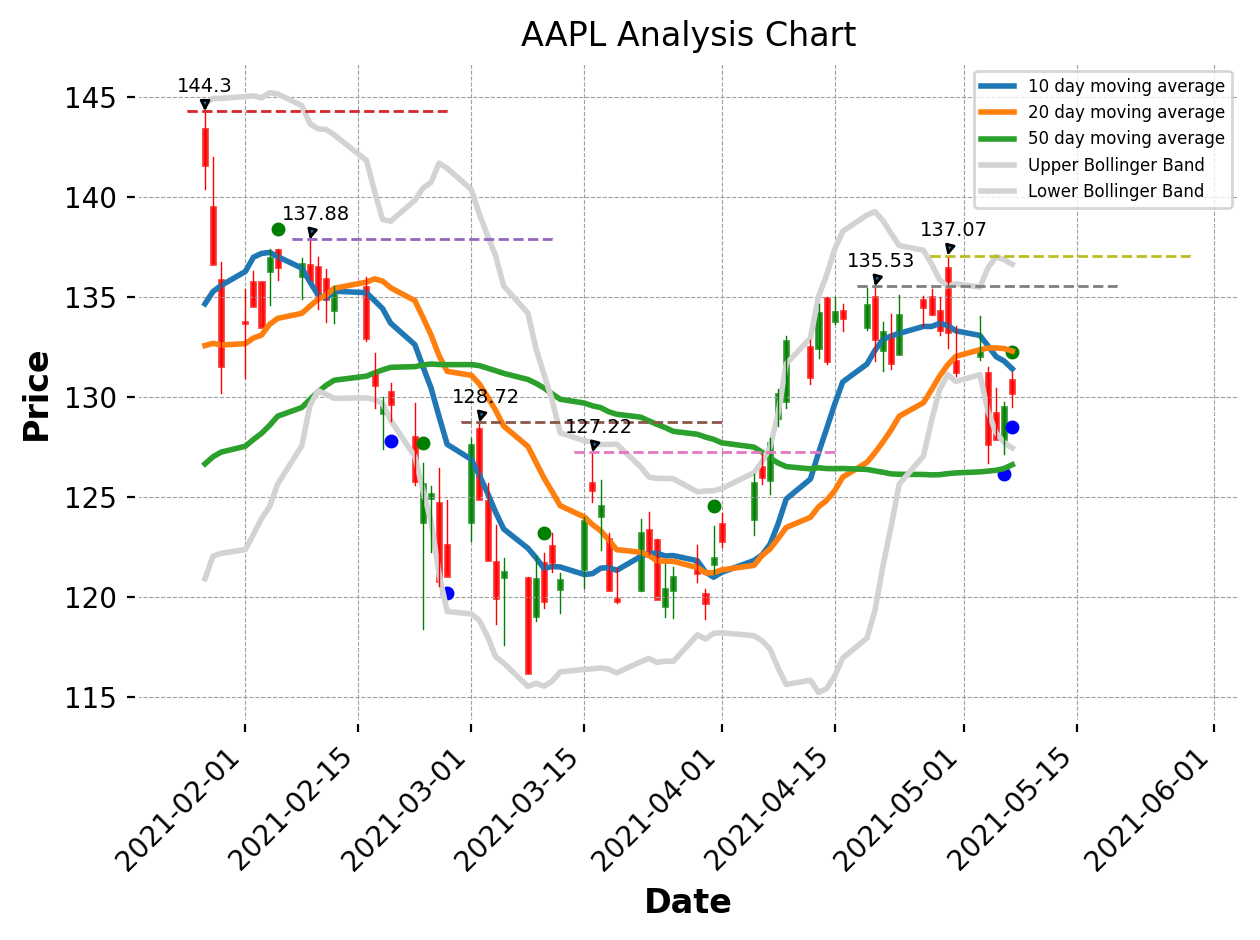

In [ ]:
#@title Simple Moving Averages and Bollinger Bands Indicator
#import relevant libraries
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime as datetime
import numpy as np
from mpl_finance import candlestick_ohlc
yf.pdr_override() #activate yahoo finance workaround

smasUsed = [10,20,50] #choose simply moving average over these day ranges
#@markdown Starting Date:
year = 2021# @param {type:"integer"}
month = 1 #@param {type:"integer"}
day = 1#@param {type:"integer"}
start = dt.datetime(year,month,day) - dt.timedelta(days = max(smasUsed)) #Sets starting point of dataframe
now = dt.datetime.now() #Sets end point of dataframe to present day
stock = input("Enter the stock symbol: ")

prices = pdr.get_data_yahoo (stock, start, now)
fig, ax1 = plt.subplots() 

#Calculate moving average
for x in smasUsed:
  sma = x
  prices['SMA_' + str(sma)] = prices.iloc[:,4].rolling(window=sma).mean() #calculates sma and creates col, storing under SMA_*sma value*

#Calculate Bollinger Bands. The Bollinger bands will be 2 standard deviations above, and 2 standard deviations below the SMA. The price is likely to revert into the Bollinger Bands if it were to exit
BBperiod = 15 #choose moving average period
stdev = 2 #Choose standard deviations
prices['SMA' + str(BBperiod)] = prices.iloc[:,4].rolling(window=BBperiod).mean() #calculates standard deviation
prices['STDEV'] = prices.iloc[:,4].rolling(window = BBperiod).std()
prices['LowerBand'] = prices['SMA' +str(BBperiod)] - (stdev*prices['STDEV'])
prices['UpperBand'] = prices['SMA' +str(BBperiod)] + (stdev*prices['STDEV'])
prices["Date"] = mdates.date2num(prices.index) #converts time stamp to number

#Calculate 10.4.4 stochastic.

Period = 10
K = 4
D = 4

prices["RolHigh"] = prices["High"].rolling(window=Period).max() #Finds High of period
prices["RolLow"] = prices["Low"].rolling(window = Period).min() #Finds Low of period
prices["stok"] = ((prices["Adj Close"] - prices["RolLow"])/(prices["RolHigh"] - prices["RolLow"]))*100
prices["K"] = prices["stok"].rolling(window=K).mean()
prices["D"] = prices["K"].rolling(window=D).mean()
prices["GD"] = prices["High"]
ohlc = []

prices = prices.iloc[max(smasUsed):]

greenDotDate = []
greenDot = []
lastK = 0
lastD = 0
lastLow = 0
lastClose = 0
lastLowBB=0

for i in prices.index:
  append_me = prices["Date"][i], prices["Open"][i], prices["High"][i], prices["Low"][i], prices["Adj Close"][i], prices["Volume"][i]
  ohlc.append(append_me)

    #Check for Green Dot
  if prices['K'][i]>prices['D'][i] and lastK<lastD and lastK <60:
    plt.plot(prices["Date"][i],prices["High"][i]+1, marker="o", ms=4, ls="", color='g') #plot green dot

    greenDotDate.append(i) #store green dot date
    greenDot.append(prices["High"][i])  #store green dot value

    #Check for Lower Bollinger Band Bounce
  if ((lastLow<lastLowBB) or (prices['Low'][i]<prices['LowerBand'][i])) and (prices['Adj Close'][i]>lastClose and prices['Adj Close'][i]>prices['LowerBand'][i]) and lastK <60:  
    plt.plot(prices["Date"][i],prices["Low"][i]-1, marker="o", ms=4, ls="", color='b') #plot blue dot
 
  #store values
  lastK=prices['K'][i]
  lastD=prices['D'][i]
  lastLow=prices['Low'][i]
  lastClose=prices['Adj Close'][i]
  lastLowBB=prices['LowerBand'][i]




for x in smasUsed:
  sma = x
  prices['SMA_' + str(sma)].plot(label = str(x) +' day moving average')
prices['UpperBand'].plot(label = 'Upper Bollinger Band', color = 'lightgray')
prices['LowerBand'].plot(label = 'Lower Bollinger Band', color = 'lightgray')

#plot candlesticks
candlestick_ohlc(ax1, ohlc, width = 0.5, colorup = 'g', colordown='r', alpha=0.75)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.yaxis.set_major_locator(mticker.MaxNLocator(8))
plt.tick_params(axis = 'x', rotation = 45)


pivots=[]
dates = [] #stores dates of pivots
counter = 0 #counts number of days since last pivot
lastPivot = 0 #Stores last Pivot value

Range = [0,0,0,0,0,0,0,0,0,0]
dateRange = [0,0,0,0,0,0,0,0,0,0]

for i in prices.index:
  currentMax = max(Range, default = 0)
  value = round(prices["High"][i],2)

  Range = Range[1:9]
  Range.append(value)
  dateRange = dateRange[1:9]
  dateRange.append(i)

  if currentMax == max(Range, default = 0):
    counter += 1
  else:
    counter = 0
  if counter == 5:
    lastPivot = currentMax
    dateloc = Range.index(lastPivot)
    lastDate = dateRange[dateloc]

    pivots.append(currentMax)
    dates.append(lastDate)

print()
numer_of_days_the_resistanct_should_hold = 30
timeD = dt.timedelta(days = numer_of_days_the_resistanct_should_hold) #determines how many days to draw pivot point for

for index in range(len(pivots)):
  plt.plot_date([dates[index]-(timeD*.075), dates[index]+ timeD],
    [pivots[index], pivots[index]], linestyle = "--", linewidth = 1, marker = ",")
  plt.annotate(str(pivots[index]), (mdates.date2num(dates[index]), pivots[index]), xytext = (-10,7),
                   textcoords = 'offset points', fontsize = 7, arrowprops = dict(arrowstyle = '-|>'))
title_upper = stock.upper()
plt.xlabel('Date')
plt.ylabel("Price")
plt.title(title_upper + ' Analysis Chart')
plt.ylim(prices["Low"].min(), prices["High"].max()*1.05)
plt.rcParams['figure.dpi'] = 200
plt.autoscale()
plt.tight_layout()
plt.legend( prop={'size': 6})
plt.show()